In [11]:
import pandas as pd

In [12]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [15]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [16]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
                'Insulin', 'BMI', 'Pedigree']

In [18]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [19]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [20]:
import tensorflow as tf

In [21]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [22]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [23]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

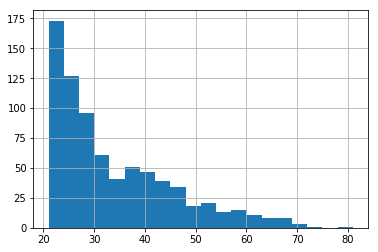

In [26]:
diabetes['Age'].hist(bins=20)

In [29]:
age_bucket = tf.feature_column.bucketized_column(age, 
                                                 boundaries=[20, 30, 40, 50, 60, 70, 80])

In [30]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree,
             assigned_group, age_bucket]

In [32]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [33]:
x_data = diabetes.drop('Class',axis=1)

In [34]:
labels = diabetes['Class']

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [39]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [40]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\HINANA~1\\AppData\\Local\\Temp\\tmpu4xclzqg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017470C5D6A0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into C:\Users\HINANA~1\AppData\Local\Temp\tmpu4xclzqg\model.ckpt.


INFO:tensorflow:loss = 6.931472, step = 1


INFO:tensorflow:global_step/sec: 298.516


INFO:tensorflow:loss = 4.2517815, step = 101 (0.336 sec)


INFO:tensorflow:global_step/sec: 504.965


INFO:tensorflow:loss = 6.432372, step = 201 (0.198 sec)


INFO:tensorflow:global_step/sec: 518.116


INFO:tensorflow:loss = 5.6776376, step = 301 (0.196 sec)


INFO:tensorflow:global_step/sec: 514.094


INFO:tensorflow:loss = 6.0741224, step = 401 (0.194 sec)


INFO:tensorflow:global_step/sec: 530.496


INFO:tensorflow:loss = 4.9538617, step = 501 (0.195 sec)


INFO:tensorflow:global_step/sec: 472.674


INFO:tensorflow:loss = 5.694969, step = 601 (0.207 sec)


INFO:tensorflow:global_step/sec: 487.697

INFO:tensorflow:loss = 3.792738, step = 701 (0.209 sec)


INFO:tensorflow:global_step/sec: 488.892

INFO:tensorflow:loss = 6.2045403, step = 801 (0.203 sec)


INFO:tensorflow:global_step/sec: 508.849


INFO:tensorflow:loss = 5.8348594, step = 901 (0.196 sec)


INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\HINANA~1\AppData\Local\Temp\tmpu4xclzqg\model.ckpt.


INFO:tensorflow:Loss for final step: 5.8639565.


In [42]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [43]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-01-23-08:01:44


INFO:tensorflow:Restoring parameters from C:\Users\HINANA~1\AppData\Local\Temp\tmpu4xclzqg\model.ckpt-1000


INFO:tensorflow:Finished evaluation at 2018-01-23-08:01:46


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72440946, accuracy_baseline = 0.65748036, auc = 0.7808865, auc_precision_recall = 0.6128626, average_loss = 0.53842396, global_step = 1000, label/mean = 0.34251967, loss = 5.259988, prediction/mean = 0.37961397


In [44]:
results

{'accuracy': 0.72440946,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7808865,
 'auc_precision_recall': 0.6128626,
 'average_loss': 0.53842396,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.259988,
 'prediction/mean': 0.37961397}

In [45]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [46]:
predictions = model.predict(pred_input_func)

In [47]:
list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\HINANA~1\AppData\Local\Temp\tmpu4xclzqg\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.54412276], dtype=float32),
  'logits': array([0.17695129], dtype=float32),
  'probabilities': array([0.45587724, 0.54412276], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.62616533], dtype=float32),
  'logits': array([0.5158007], dtype=float32),
  'probabilities': array([0.3738347 , 0.62616533], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3946321], dtype=float32),
  'logits': array([-0.42788243], dtype=float32),
  'probabilities': array([0.6053679 , 0.39463207], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.33637193], dtype=float32),
  'logits': array([-0.6795044], dtype=float32),
  'probabilities': array([0.6636281 , 0.33637193], dtype=float32)},
 {'class_

In [48]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\HINANA~1\\AppData\\Local\\Temp\\tmpfwppfb0a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017471BB0898>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [49]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [50]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree,
             embedded_group_col, age_bucket]

In [51]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [52]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\HINANA~1\\AppData\\Local\\Temp\\tmp5i8wc1ya', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017471BB09E8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [53]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into C:\Users\HINANA~1\AppData\Local\Temp\tmp5i8wc1ya\model.ckpt.


INFO:tensorflow:loss = 7.1677227, step = 1


INFO:tensorflow:global_step/sec: 322.266


INFO:tensorflow:loss = 6.072645, step = 101 (0.311 sec)


INFO:tensorflow:global_step/sec: 494.802


INFO:tensorflow:loss = 5.245202, step = 201 (0.202 sec)


INFO:tensorflow:global_step/sec: 477.156


INFO:tensorflow:loss = 6.9561796, step = 301 (0.210 sec)


INFO:tensorflow:global_step/sec: 502.438

INFO:tensorflow:loss = 3.245342, step = 401 (0.202 sec)


INFO:tensorflow:global_step/sec: 482.972


INFO:tensorflow:loss = 4.2490377, step = 501 (0.206 sec)


INFO:tensorflow:global_step/sec: 462.804


INFO:tensorflow:loss = 3.0816777, step = 601 (0.214 sec)


INFO:tensorflow:global_step/sec: 529.092


INFO:tensorflow:loss = 8.562897, step = 701 (0.189 sec)


INFO:tensorflow:global_step/sec: 506.263


INFO:tensorflow:loss = 4.5569267, step = 801 (0.198 sec)


INFO:tensorflow:global_step/sec: 527.617


INFO:tensorflow:loss = 4.567149, step = 901 (0.191 sec)


INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\HINANA~1\AppData\Local\Temp\tmp5i8wc1ya\model.ckpt.


INFO:tensorflow:Loss for final step: 5.010309.


In [54]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [55]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-01-23-08:13:53


INFO:tensorflow:Restoring parameters from C:\Users\HINANA~1\AppData\Local\Temp\tmp5i8wc1ya\model.ckpt-1000


INFO:tensorflow:Finished evaluation at 2018-01-23-08:13:54


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7322835, accuracy_baseline = 0.65748036, auc = 0.80817676, auc_precision_recall = 0.63508475, average_loss = 0.5080791, global_step = 1000, label/mean = 0.34251967, loss = 4.963542, prediction/mean = 0.38322672


{'accuracy': 0.7322835,
 'accuracy_baseline': 0.65748036,
 'auc': 0.80817676,
 'auc_precision_recall': 0.63508475,
 'average_loss': 0.5080791,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.963542,
 'prediction/mean': 0.38322672}